In [168]:
def tree(label, branches = []):
    return [label] + branches
def label(tree):
    return tree[0]
def branches(tree):
    return tree[1:]
def is_leaf(tree):
    return len(branches(tree)) == 0
def print_tree(t, indent = 0):
    print(indent * " ", label(t))
    for b in branches(t):
        print_tree(b, indent + 2)



# Tarea 5

**Instrucciones**

+ Responda las siguientes preguntas según el enunciado de cada una. 

+ Al terminar guarde su archivo con los apellidos de cada uno en el grupo separados por el símbolo _ por ejemplo: **apellido1_apellido2.jpynb**. 

+ Envíe la tarea al correo: german.combariza@uexternado.edu.co antes de las 11:59pm de la fecha dada. Tareas enviadas después de la hora no se reciben.

+ **Secciones:**
Para esta tarea ud puede consultas las siguientes secciones del libro: 
 Seccion 2.2 y 2.3 de: http://composingprograms.com/

+ Usted puede trabajar en grupo, pero por favor cada uno escriba sus propias solucinoes, **la copia será tratada de acuerdo al reglamento estudiantil**.  

---
Antes de comenzar, un comentario rápido sobre la recursividad con estructuras de datos de árbol. Considere la siguiente función.

In [171]:
def min_depth(t):
    """Una función simple para devolver la distancia entre la raíz de t y su hoja más cercana"""
    if is_leaf(t):
        return 0 #Caso base --- la distancia entre un nodo y sí mismo es cero
    h = float('inf') # La versión de Python del infinito
    for b in branches(t):
        if is_leaf(b): return 1 # !!!
        h = min(h, 1 + min_depth(b))
    return h

La línea marcada con !!! es una violación de recurrencia. Si bien nuestro código funciona correctamente cuando está presente, al realizar esta verificación estamos haciendo un trabajo que debería realizar el siguiente nivel de recursividad: ya tenemos una declaración if que maneja cualquier entrada a min_ depth que son hojas, por lo que no deberíamos incluya esta línea para eliminar la redundancia en nuestro código.

In [172]:
def min_depth(t):
    """A simple function to return the distance between t's root and its closest leaf"""
    if is_leaf(t):
        return 0
    h = float('inf')
    for b in branches(t):
        # Still works fine!
        h = min(h, 1 + min_depth(b))
    return h

**Móviles**

Estamos haciendo un planetario móvil. Un móvil es un tipo de escultura colgante. Un móvil binario consta de dos brazos. Cada brazo es una varilla de cierta longitud, de la que cuelga un planeta u otro móvil. Por ejemplo, el siguiente diagrama muestra los brazos izquierdo y derecho del Móvil A y lo que cuelga en los extremos de cada uno de esos brazos.

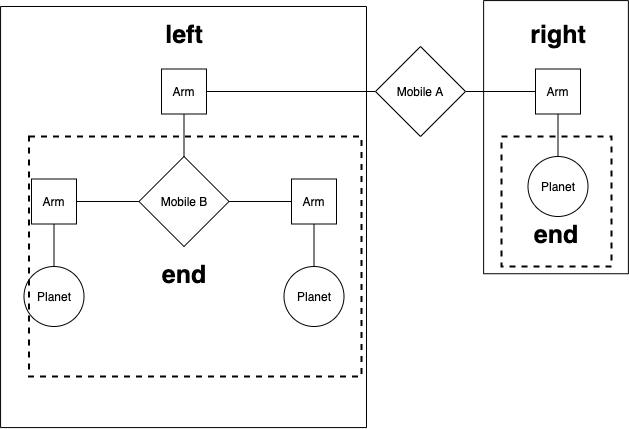

Representaremos un móvil binario utilizando las abstracciones de datos a continuación:

+ Un móvil debe tener un brazo izquierdo y un brazo derecho.
+ Un brazo tiene una longitud positiva y debe tener algo colgando al + final, ya sea un móvil o un planeta.
+ Un planeta tiene un tamaño positivo y nada cuelga de él.

**Pregunta 1:** Pesos

Implemente la abstracción de datos de planetas completando el constructor de planetas y el selector de tamaño para que un planeta se represente usando una lista de dos elementos donde el primer elemento es la cadena 'planeta' y el segundo elemento es su tamaño.

In [173]:
def mobile(left, right):
    """Construct a mobile from a left arm and a right arm."""
    assert is_arm(left), "left must be a arm"
    assert is_arm(right), "right must be a arm"
    return ['mobile', left, right]

def is_mobile(m):
    """Return whether m is a mobile."""
    return type(m) == list and len(m) == 3 and m[0] == 'mobile'

def left(m):
    """Select the left arm of a mobile."""
    assert is_mobile(m), "must call left on a mobile"
    return m[1]

def right(m):
    """Select the right arm of a mobile."""
    assert is_mobile(m), "must call right on a mobile"
    return m[2]

In [174]:
def arm(length, mobile_or_planet):
    """Construct a arm: a length of rod with a mobile or planet at the end."""
    assert is_mobile(mobile_or_planet) or is_planet(mobile_or_planet)
    return ['arm', length, mobile_or_planet]

def is_arm(s):
    """Return whether s is a arm."""
    return type(s) == list and len(s) == 3 and s[0] == 'arm'

def length(s):
    """Select the length of a arm."""
    assert is_arm(s), "must call length on a arm"
    return s[1]

def end(s):
    """Select the mobile or planet hanging at the end of a arm."""
    assert is_arm(s), "must call end on a arm"
    return s[2]

In [175]:
def planet(size):
    """Construct a planet of some size."""
    assert size > 0
    return ['planet', size]

def size(w):
    """Select the size of a planet."""
    assert is_planet(w), 'must call size on a planet'
    return w[1]

def is_planet(w):
    """Whether w is a planet."""
    return type(w) == list and len(w) == 2 and w[0] == 'planet'

In [176]:
def examples():
    t = mobile(arm(1, planet(2)),
               arm(2, planet(1)))
    u = mobile(arm(5, planet(1)),
               arm(1, mobile(arm(2, planet(3)),
                              arm(3, planet(2)))))
    v = mobile(arm(4, t), arm(2, u))
    return (t, u, v)

El ejemplo de total_weight se proporciona para demostrar el uso de las abstracciones de móvil, brazo y planeta.

In [177]:
def total_weight(m):
    """Return the total weight of m, a planet or mobile.

    >>> t, u, v = examples()
    >>> total_weight(t)
    3
    >>> total_weight(u)
    6
    >>> total_weight(v)
    9
    >>> from construct_check import check
    >>> # checking for abstraction barrier violations by banning indexing
    >>> check(HW_SOURCE_FILE, 'total_weight', ['Index'])
    True
    """
    if is_planet(m):
        return size(m)
    else:
        assert is_mobile(m), "must get total weight of a mobile or a planet"
        return total_weight(end(left(m))) + total_weight(end(right(m)))
    

**Pregunta 2:** Equilibrado

Implemente la función `balanced`, que devuelve si m es un móvil balanceado. Un móvil está equilibrado si se cumplen las dos condiciones siguientes:

+ El torque aplicado por su brazo izquierdo es igual al aplicado por su brazo derecho. El torque del brazo izquierdo es la longitud de la barra izquierda multiplicada por el peso total que cuelga de esa barra. Igualmente para la derecha. Por ejemplo, si el brazo izquierdo tiene una longitud de 5, y en el extremo del brazo izquierdo cuelga un móvil de peso 10, el par en el lado izquierdo de nuestro móvil es de 50.
+ Cada uno de los móviles que cuelgan al final de sus brazos está equilibrado.

Los planetas en sí mismos están equilibrados, ya que no hay nada colgando de ellos.

In [178]:
def balanced(m):
    """Devuelve si m está equilibrado.

    >>> t, u, v = examples()
    >>> balanced(t)
    True
    >>> balanced(v)
    True
    >>> w = mobile(arm(3, t), arm(2, u))
    >>> balanced(w)
    False
    >>> balanced(mobile(arm(1, v), arm(1, w)))
    False
    >>> balanced(mobile(arm(1, w), arm(1, v)))
    False
    >>> from construct_check import check
    >>> # checking for abstraction barrier violations by banning indexing
    >>> check(HW_SOURCE_FILE, 'balanced', ['Index'])
    True
    """
    if is_planet(m):
        return True
    
    else:
        return (total_weight(end(left(m))) * length(left(m))) == (total_weight(end(right(m)))) * length(right(m)) and balanced(end(left(m))) and balanced(end(right(m)))
    
t, u, v = examples()
balanced(t)
balanced(v)

True

**Pregunta 3:**Totales

Implemente totals_tree, que toma un móvil o un planeta y devuelve un árbol cuya raíz es el peso total de la entrada. Para un planeta, totals_tree debería devolver una hoja. Para un móvil, totals_tree debe devolver un árbol cuya etiqueta sea el peso total de ese móvil y cuyas ramas sean totals_trees para los extremos de sus brazos. Como recordatorio, la descripción de la abstracción de datos del árbol se puede encontrar aquí.

In [179]:
def totals_tree(m):
    """Devuelve un árbol que representa el móvil con su peso total en la raíz.

    >>> t, u, v = examples()
    >>> print_tree(totals_tree(t))
    3
      2
      1
    >>> print_tree(totals_tree(u))
    6
      1
      5
        3
        2
    >>> print_tree(totals_tree(v))
    9
      3
        2
        1
      6
        1
        5
          3
          2
    """
    "*** YOUR CODE HERE ***"
    if is_planet(m): return tree(total_weight(m))
    
    return tree(total_weight(m), [totals_tree(end(left(m))), totals_tree(end(right(m)))])
    
    
t, u, v = examples()
print_tree(totals_tree(u))



 6
   1
   5
     3
     2


**Pregunta 4:** Reemplaza a Loki en hoja

Defina replace_loki_at_leaf, que toma un árbol t y un valor lokis_replacement. replace_loki_at_leaf devuelve un nuevo árbol que es igual a t excepto que cada etiqueta de hoja igual a "loki" ha sido reemplazada por lokis_replacement

In [199]:
def replace_loki_at_leaf(t, lokis_replacement):
    """Returns a new tree where every leaf value equal to "loki" has
    been replaced with lokis_replacement.

    >>> yggdrasil = tree('odin',
    ...                  [tree('balder',
    ...                        [tree('loki'),
    ...                         tree('freya')]),
    ...                   tree('frigg',
    ...                        [tree('loki')]),
    ...                   tree('loki',
    ...                        [tree('sif'),
    ...                         tree('loki')]),
    ...                   tree('loki')])
    >>> laerad = copy_tree(yggdrasil) # copy yggdrasil for testing purposes
    >>> print_tree(replace_loki_at_leaf(yggdrasil, 'freya'))
    odin
      balder
        freya
        freya
      frigg
        freya
      loki
        sif
        freya
      freya
    >>> laerad == yggdrasil # Make sure original tree is unmodified
    True
    """
    if label(t) == 'loki': 
        t[0] = lokis_replacement
        
    for b in branches(t):
        if label(b) == 'loki':
            b[0] = lokis_replacement
            
        if is_leaf(b) == False:
            x = replace_loki_at_leaf(b, lokis_replacement)
    return t
    
p = tree('odin',[tree('balder',[tree('loki'),tree('freya')]),tree('frigg',[tree('loki')]),tree('loki',[tree('sif'),tree('loki')]),tree('loki')])
print_tree(replace_loki_at_leaf(yggdrasil, 'freya'))

 odin
   balder
     freya
     freya
   frigg
     freya
   freya
     sif
     freya
   freya


**Pregunta 5:** Tiene camino

Escriba una función has_path que tome un árbol t y una palabra de cadena. Devuelve True si hay una ruta que comienza desde la raíz donde las entradas a lo largo de la ruta deletrean la palabra, y False en caso contrario. (Esta estructura de datos se llama trie y tiene muchas aplicaciones geniales, como autocompletar). Puede suponer que la etiqueta de cada nodo es exactamente un carácter.



In [302]:
def has_path(t, word):
    """Return whether there is a path in a tree where the entries along the path
    spell out a particular word.

    >>> greetings = tree('h', [tree('i'),
    ...                        tree('e', [tree('l', [tree('l', [tree('o')])]),
    ...                                   tree('y')])])
    >>> print_tree(greetings)
    h
      i
      e
        l
          l
            o
        y
    >>> has_path(greetings, 'h')
    True
    >>> has_path(greetings, 'i')
    False
    >>> has_path(greetings, 'hi')
    True
    >>> has_path(greetings, 'hello')
    True
    >>> has_path(greetings, 'hey')
    True
    >>> has_path(greetings, 'bye')
    False
    >>> has_path(greetings, 'hint')
    False
    """
    assert len(word) > 0, 'no path for empty word.'
    hol = ''
    if label(t) == word[0] and len(word) == 1:
        return True   
    def tree_str(t, hol): 
        for k in branches(t):
            
            hol += label(k)
            
            if is_leaf(k) == False:
                tree_str(k,hol)
                print(hol)
        
    print(hol) 
        
        
    
    LISTONGO = tree_str(t, hol)
    print(LISTONGO)
    
        
    
greetings = tree('h', [tree('i'), tree('e', [tree('l', [tree('l', [tree('o')])]),tree('y')])])
#print_tree(greetings)
has_path(greetings, 'hi')


iell
iel
ie
None


In [ ]:
for k in branches(t):
        hol += label(k)
        for z in branches(k):
            hol += label(z)
            for w in branches(z):
                hol += label(w)
                for m in branches(w):
                    hol += label(m)